## Observations and Insights

## Dependencies and starter code

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
%matplotlib notebook

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merge_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merge_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

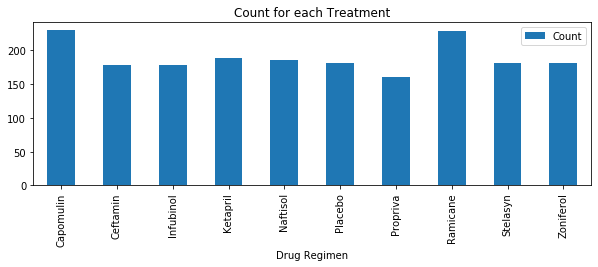

<Figure size 432x288 with 0 Axes>

In [102]:
### Generate a bar plot showing number of data points for each treatment regimen using pandas

# Create DataFrame
grouped_df = pd.DataFrame(merge_table.groupby(["Drug Regimen"]).count()).reset_index()

# Filter DataFrame
regimen_datapoints = grouped_df[["Drug Regimen","Mouse ID"]]
regimen_datapoints = regimen_datapoints.rename(columns={"Mouse ID": "Count"})

# Index
regimen_datapoints = regimen_datapoints.set_index("Drug Regimen")

# Create Bar chart
regimen_datapoints.plot(kind = "bar", figsize = (10,3))

# Format
plt.title("Count for each Treatment")

plt.show()
plt.tight_layout()

In [103]:
### Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Define regimens
drug_regimens = summary_df.index.tolist()
drug_regimens

# Filter data
drug_regimens = summary_df.index.tolist()
drug_regimens

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [104]:
# Convert regimen count into a list
regimen_count = (merge_table.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

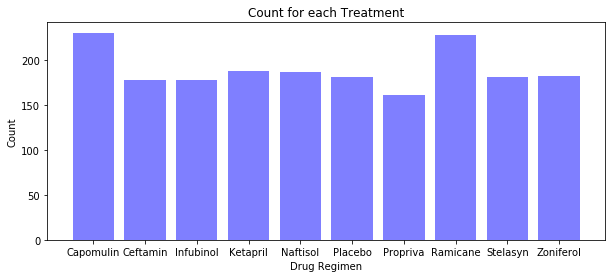

In [105]:
# x-axis
x_axis = drug_regimens

# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")

# Ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens)

# Format
plt.title("Count for each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

## Pie plots

In [106]:
### Generate a pie plot showing the distribution of female versus male mice using pandas

# DataFrame
gender_df = pd.DataFrame(merge_table.groupby(["Sex"]).count()).reset_index()
gender_df.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [107]:
# Filter DataFrame
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,935
1,Male,958


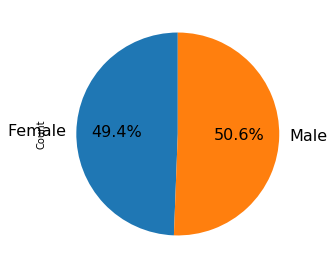

In [108]:
# Create plot
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y = "Count", ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=gender_df['Sex'], legend = False, fontsize=16)

In [109]:
### Generate a pie plot showing the distribution of female versus male mice using pyplot

# Import 
import matplotlib.pyplot as plt

# Lists
gender_count = (merge_table.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

[935, 958]

([<matplotlib.patches.Wedge at 0x7fa69b8aca20>,
 [Text(-0.7887477729166416, -0.904365496201087, 'Females'),
  Text(0.723018791840255, 0.8290017048509963, 'Males')],
 [Text(-0.4601028675347076, -0.527546539450634, '49.4%'),
  Text(0.39437388645832083, 0.4521827481005434, '50.6%')])

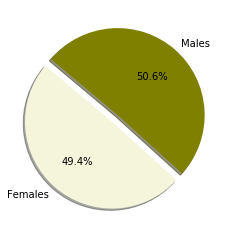

In [110]:
# Format
labels = ["Females", "Males"]
colors = ["beige", "olive"]
explode = (0.1, 0)

# Create plot
plt.pie(gender_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [111]:

### Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Extract regimenes from the DataFrame
best_regimes = merge_table[merge_table["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)
best_regimes
best_regimes_data = best_regimes[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimes_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


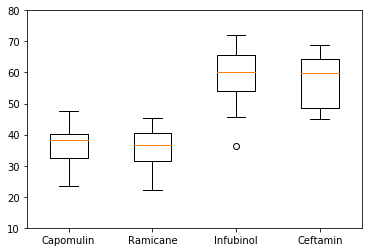

In [112]:
### Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Group data
best_regimens_sort = best_regimes_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
best_regimens_sort.head()

# Create DataFrame
best_regimen_df = best_regimens_sort.to_frame()
best_regimen_df

# Create list
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create box plot
final_df = best_regimen_df.reset_index()
tumor_lists = final_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

In [113]:
### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new DataFrame that looks into Capomulin
capomulin_df = merge_table.loc[merge_table["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()

# Single Mouse DataFrame
cap_single_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]
cap_single_df

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,10,s185,Capomulin,Female,3,17,0,45.000000,0
1,11,s185,Capomulin,Female,3,17,5,43.878496,0
2,12,s185,Capomulin,Female,3,17,10,37.614948,0
3,13,s185,Capomulin,Female,3,17,15,38.177232,0
4,14,s185,Capomulin,Female,3,17,20,36.866876,0
5,15,s185,Capomulin,Female,3,17,25,33.949940,0
6,16,s185,Capomulin,Female,3,17,30,32.959671,1
7,17,s185,Capomulin,Female,3,17,35,28.328531,1
8,18,s185,Capomulin,Female,3,17,40,25.472143,1
9,19,s185,Capomulin,Female,3,17,45,23.343598,1


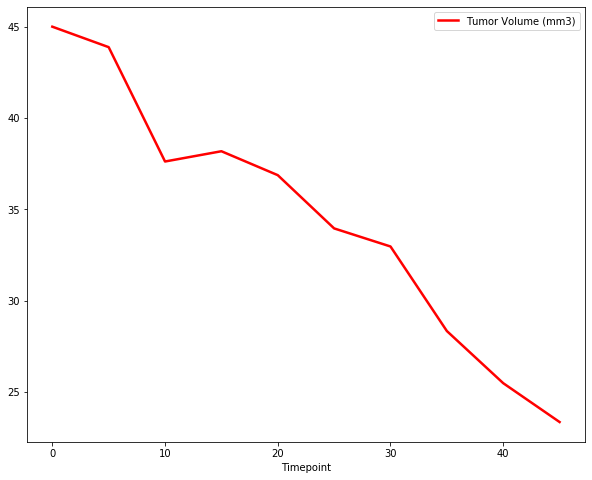

In [114]:
# 2 cloumns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Index
cap_single_df = cap_single_df.reset_index(drop=True)

# Create plot
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='red')

In [115]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# DataFrame
capomulin_df.head()

# 3 columns
reduced_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Calculate average tumor volume for each mouse in the Capomulin regimen
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Set the 'Mouse ID' as our index
average_cap = average_cap.set_index('Mouse ID')
average_cap.head()


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344


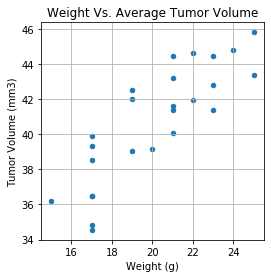

In [116]:
# Create plot
average_cap.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", grid = True, figsize = (4,4), title = "Weight Vs. Average Tumor Volume")
plt.show()



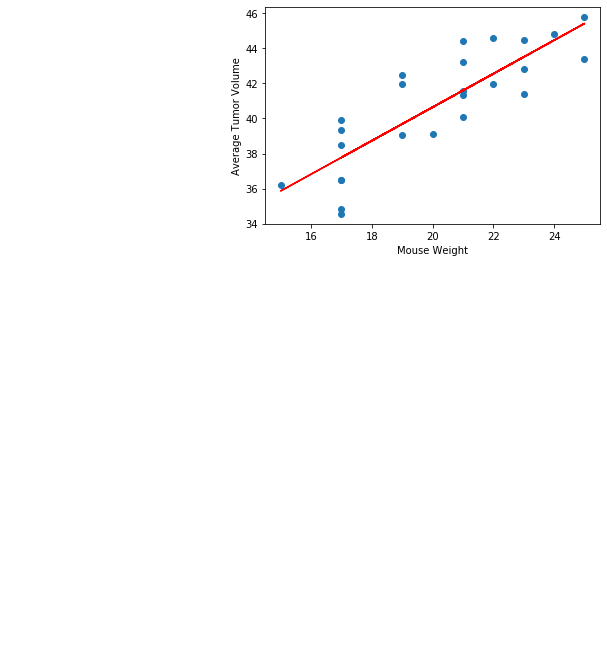

In [118]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Import
import matplotlib.pyplot as plt

# Caluculate coefficeient correlation
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)

# Create linear regression plot
x_values = average_cap['Weight (g)']
y_values = average_cap['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize = 10, color = "blue")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

### Not sure why this is not working ###
